Define the 'drop' of a hill `h` as the height difference between `h` and the highest point on the boundary of the b.o.a. of `h`. In this notebook, we try to find which hill has the largest drop.

In [4]:
import  nevis
import numpy as np 
import matplotlib.pyplot as plt
h = nevis.gb()

label = np.load('../res/label.npy')
maxima = np.load('../res/maxima.npy')

In [5]:
maxima_num = maxima.shape[0]
maxima_num

957174

In [6]:
# The highest point on the boundary of each b.o.a.
boundary_max = np.zeros(maxima_num, dtype=int)

In [7]:

# Get the dimensions of the label array
rows, cols = label.shape

In [8]:
def is_boundary_of_boa(i, j):
    """
    Check if the given index (i, j) is on the boundary or has a neighboring cell
    with a different label value.

    Parameters:
    label (np.ndarray): 2D numpy array with shape (26000, 14000).
    i (int): Row index of the label array.
    j (int): Column index of the label array.

    Returns:
    bool: True if the index is on the boundary or has a neighbor with a different label value.
    """
    
    # Check if (i, j) is on the boundary of the array
    if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
        return True
    
    # Get the value of the current cell
    current_value = label[i, j]
    
    # Check all 8 neighbors to see if any has a different value
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            # Skip the center cell itself
            if di == 0 and dj == 0:
                continue
            
            # Calculate neighbor coordinates
            ni, nj = i + di, j + dj
            
            # Check if the neighbor is within bounds and has a different value
            if 0 <= ni < rows and 0 <= nj < cols:
                if label[ni, nj] != current_value:
                    return True
    
    # If no neighbors are different and it's not on the boundary, return False
    return False


In [9]:
from tqdm import tqdm

In [10]:

for i in tqdm(range(rows)):
    for j in range(cols):
        if not is_boundary_of_boa(i, j):
            continue
        k = label[i, j] # index of b.o.a. this point belongs to
        # mi, mj = maxima[k] # local optimum of this b.o.a.
        height = h[i, j]
        if height > boundary_max[k]:
            boundary_max[k] = height

  0%|          | 0/26000 [00:00<?, ?it/s]

100%|██████████| 26000/26000 [25:04<00:00, 17.28it/s]


In [12]:
max_diff, max_index = 0, None
for index in range(maxima_num):
    mi, mj = maxima[index]
    diff = abs(boundary_max[index] - h[mi, mj])
    if diff > max_diff:
        max_diff = diff
        max_index = index

In [14]:
max_index, max_diff

(1488, np.float64(349.5999755859375))

In [52]:
mi, mj = maxima[max_index]
mi, mj, h[mi, mj]

(np.int32(15943), np.int32(4480), np.float32(896.6))

In [53]:
n = 5

print(h[mi-n:mi+n+1, mj-n:mj+n+1])

[[724.8 727.9 727.6 729.  722.2 718.3 715.6 709.  700.5 686.4 672.6]
 [761.1 767.3 765.6 763.5 759.  756.  751.6 743.4 735.  723.3 709.6]
 [793.3 801.6 801.3 805.1 798.5 793.3 791.8 783.3 769.6 755.  740.7]
 [799.9 820.4 835.5 837.5 834.  828.1 823.2 816.  801.7 785.4 770.1]
 [803.4 825.3 843.7 862.6 867.6 867.2 857.9 847.6 834.9 820.2 804.3]
 [802.  826.6 851.  872.8 887.2 896.6 889.2 875.6 860.9 847.7 832. ]
 [794.3 823.5 854.1 874.6 882.  890.7 895.3 880.3 870.4 858.7 848. ]
 [791.2 818.9 841.  856.9 871.7 876.7 874.1 867.  860.1 854.1 850.4]
 [784.9 805.5 826.8 839.2 849.8 850.1 847.  845.3 841.5 837.6 833.1]
 [779.1 797.6 811.1 816.1 822.9 822.6 824.7 823.8 823.6 817.9 811.8]
 [765.3 777.8 787.4 799.  798.8 798.9 799.5 804.  803.5 802.1 794.2]]


In [54]:
hill, dist = nevis.Hill.nearest(nevis.Coords(gridx=mj*50, gridy=mi*50))

In [55]:
hill.name, hill.height

('Ben Tee', 904.0)

So Ben Tee with height 904m (but on the map it has only 896.6m) has the largest drop of 349.6m.

In [59]:
x, y = hill.coords.grid
h[y//50, x//50] # Just to show that the map is off

np.float32(895.3)

In [57]:
boundary_max[max_index]

np.int64(547)

In [58]:
max_index

1488

Someone claimed that Moel Siabod should be the answer. Let's see how it performs:

In [60]:
hill2 = nevis.Hill.by_name('Moel Siabod')

In [61]:
x2, y2 = hill2.coords.grid
h[y2 // 50, x2 // 50]

np.float32(866.1)

In [63]:
index2 = label[y2 // 50, x2 // 50]
index2

np.int32(1947)

In [64]:
mi2, mj2 = maxima[index2]
mi2, mj2

(np.int32(7092), np.int32(5410))

In [65]:
y2 // 50, x2 // 50 # Great! The two coordinates match

(np.int64(7092), np.int64(5410))

In [66]:
h[mi2, mj2] - boundary_max[index2]

np.float64(67.0999755859375)

Let's now make some plots:

In [68]:
from boa import plot_label, get_part

Progress of finding local max: 1 / 151
Progress of finding local max: 151 / 151
Current iteration of expanding local max: 1
Current iteration of expanding local max: 2
Current iteration of expanding local max: 3
Current iteration of expanding local max: 4
Current iteration of expanding local max: 5
Current iteration of expanding local max: 6
Current iteration of expanding local max: 7
Current iteration of expanding local max: 8
Current iteration of expanding local max: 9
Now doing BFS to connect flat local maxima... 
Progress of labelling b.o.a.: 1 / 151
Progress of labelling b.o.a.: 151 / 151


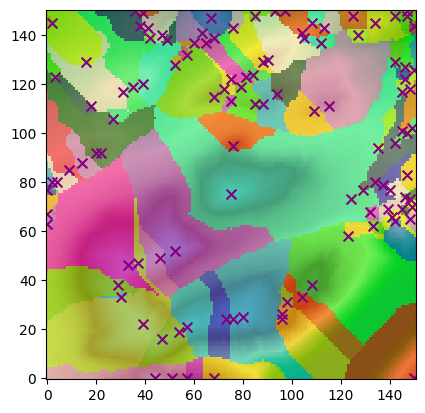

In [74]:
part = get_part(h, maxima[max_index], 151) # Ben Tee
plot_label(part, alpha=0.5)

Progress of finding local max: 1 / 151
Progress of finding local max: 151 / 151
Current iteration of expanding local max: 1
Current iteration of expanding local max: 2
Current iteration of expanding local max: 3
Current iteration of expanding local max: 4
Current iteration of expanding local max: 5
Current iteration of expanding local max: 6
Current iteration of expanding local max: 7
Current iteration of expanding local max: 8
Current iteration of expanding local max: 9
Now doing BFS to connect flat local maxima... 
Progress of labelling b.o.a.: 1 / 151
Progress of labelling b.o.a.: 151 / 151


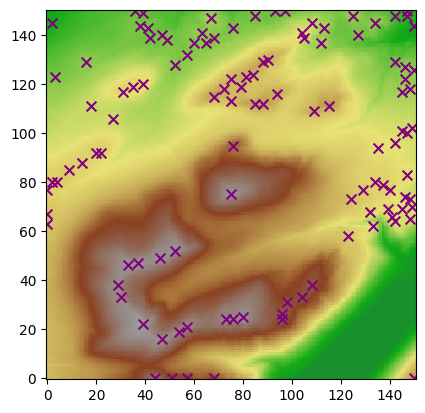

In [75]:
plot_label(part, alpha=0)

Progress of finding local max: 1 / 151
Progress of finding local max: 151 / 151
Current iteration of expanding local max: 1
Current iteration of expanding local max: 2
Current iteration of expanding local max: 3
Now doing BFS to connect flat local maxima... 
Progress of labelling b.o.a.: 1 / 151
Progress of labelling b.o.a.: 151 / 151


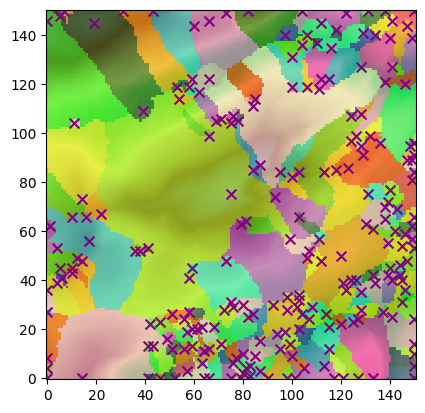

In [72]:
part2 = get_part(h, maxima[index2], 151) # Moel Siabod
plot_label(part2, alpha=0.5, seed=12)

Two nearby points of similar heights are classified as local optima and make the drop of Moel Siabod rather small.

Progress of finding local max: 1 / 151
Progress of finding local max: 151 / 151
Current iteration of expanding local max: 1
Current iteration of expanding local max: 2
Current iteration of expanding local max: 3
Now doing BFS to connect flat local maxima... 
Progress of labelling b.o.a.: 1 / 151
Progress of labelling b.o.a.: 151 / 151


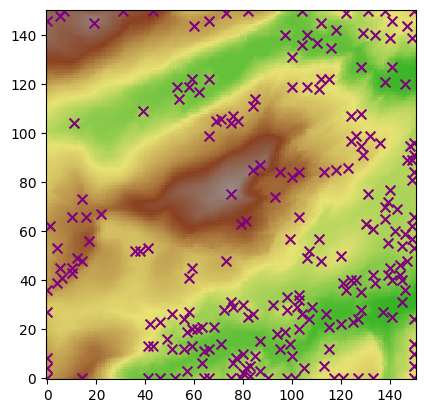

In [73]:
plot_label(part2, alpha=0, seed=12)